# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, RGBchannels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

#print("X_train[0] is \n" + str(X_train[0])) ... That shows the train data has not been normarized yet.

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

The label of the image = 20

The RGB image is 


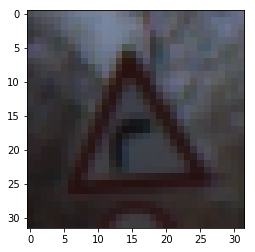

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random


index = random.randint(0, len(X_train))
print("The label of the image = {}".format(y_train[index]))
print("\nThe RGB image is ")
plt.imshow(X_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

#### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2
from sklearn.utils import shuffle


''' Rotate the train data (15[deg] & -15[deg])'''
print("Rotating...")
rows, cols = X_train.shape[1], X_train.shape[2]
rotate_X_train = {
    'ccw':np.copy(X_train),
    'cw':np.copy(X_train)
}
rotate_M = {
    'ccw':cv2.getRotationMatrix2D((cols/2,rows/2), 15, 1),
    'cw':cv2.getRotationMatrix2D((cols/2,rows/2), -15, 1)
}
for direction in ['ccw', 'cw']:
    for i in range(n_train):
        rotate_X_train[direction][i] = cv2.warpAffine(X_train[i], rotate_M[direction], (cols,rows))
print("The train data has been rotated")

        
''' Translate the train data (2pixels prallel move to four corner) '''
print("Translating...")
pixels = 2
rows, cols = X_train.shape[1], X_train.shape[2]
translate_X_train = {
    'topleft':np.copy(X_train), 'topright':np.copy(X_train),
    'bottomleft':np.copy(X_train), 'bottomright':np.copy(X_train)
}
translate_M = {
    'topleft':np.float32([[1,0,-pixels], [0,1,-pixels]]), 'topright':np.float32([[1,0,pixels], [0,1,-pixels]]),
    'bottomleft':np.float32([[1,0,-pixels], [0,1,pixels]]), 'bottomright':np.float32([[1,0,pixels], [0,1,pixels]])
}
for direction in ['topleft', 'topright', 'bottomleft', 'bottomright']:
    for i in range(n_train):
        translate_X_train[direction][i] = cv2.warpAffine(X_train[i], translate_M[direction], (cols,rows))
print("The train data has been translated")


''' Zoom the train data (2pixels zoom up & down)'''
print("Zooming...")
pixels = 2
zoom_X_train = {
    'up':np.copy(X_train),
    'down':np.copy(X_train)
}
ratio = {
    'up':(image_shape[0]+2*pixels)/image_shape[0],
    'down':(image_shape[0]-2*pixels)/image_shape[0]
}
for direction in ['up', 'down']:
    for i in range(n_train):
        zoomed_image = cv2.resize(X_train[i], None, fx=ratio[direction], fy=ratio[direction], interpolation=cv2.INTER_CUBIC)
        if (direction == 'up'):
            zoomed_image = zoomed_image[pixels:pixels+image_shape[0], pixels:pixels+image_shape[0]]
        elif (direction == 'down'):
            zoomed_image = np.pad(zoomed_image, ((pixels,pixels),(pixels,pixels), (0,0)), 'constant')
        zoom_X_train[direction][i] = zoomed_image
print("The train data has been zoomed")


''' Flip the train data (https://navoshta.com/traffic-signs-classification/) '''
print("Flipping...")
# Classes of signs that, when flipped horizontally, should still be classified as the same class
flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
# Classes of signs that, when flipped vertically, should still be classified as the same class
flippable_vertically = np.array([1, 5, 12, 15, 17])
# Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
flippable_both = np.array([32, 40])
# Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
cross_flippable = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
# Initialize `flip_X_train` whose shape is same as `X_train` with zeros.
flip_X_train = np.zeros(np.append(1, X_train[0].shape))
flip_y_train = np.array([])
for i in range(n_train):
    if (y_train[i] in flippable_horizontally):
        flip_X_train = np.append(flip_X_train, np.expand_dims(cv2.flip(X_train[i],1),axis=0), axis=0)
        flip_y_train = np.append(flip_y_train, y_train[i])
    if (y_train[i] in flippable_vertically):
        flip_X_train = np.append(flip_X_train, np.expand_dims(cv2.flip(X_train[i],0),axis=0), axis=0)
        flip_y_train = np.append(flip_y_train, y_train[i])
    if (y_train[i] in flippable_both):
        flip_X_train = np.append(flip_X_train, np.expand_dims(cv2.flip(X_train[i],-1),axis=0), axis=0)
        flip_y_train = np.append(flip_y_train, y_train[i])
    if (y_train[i] in cross_flippable[:, 0]):
        flip_X_train = np.append(flip_X_train, np.expand_dims(cv2.flip(X_train[i],1),axis=0), axis=0)
        flip_y_train = np.append(flip_y_train, cross_flippable[y_train[i]==cross_flippable[:,0], 1])
# Trancate the first element of `flip_X_train` that all elements are zeros, and cast to uint8 for RGB.
# (N+1)x32x32xC ---> Nx32x32xC
flip_X_train = flip_X_train[1: , ...].astype(np.uint8)
print("The train data has been fliiped")


''' Add all augmentied data '''
# Save the original `y_train`  before adding
original_y_train = np.copy(y_train)
# Add rotated data
for direction in ['ccw', 'cw']:
    assert(rotate_X_train[direction].shape[0] == original_y_train.shape[0])
    X_train = np.append(X_train, rotate_X_train[direction], axis=0)
    y_train = np.append(y_train, original_y_train, axis=0)
# Add translated data
for direction in ['topleft', 'topright', 'bottomleft', 'bottomright']:
    assert(translate_X_train[direction].shape[0] == original_y_train.shape[0])
    X_train = np.append(X_train, translate_X_train[direction], axis=0)
    y_train = np.append(y_train, original_y_train, axis=0)
#Add zoomed data
for direction in ['up', 'down']:
    assert(zoom_X_train[direction].shape[0] == original_y_train.shape[0])
    X_train = np.append(X_train, zoom_X_train[direction], axis=0)
    y_train = np.append(y_train, original_y_train, axis=0)
# Add flipped data
assert(flip_X_train.shape[0] == flip_y_train.shape[0])
X_train = np.append(X_train, flip_X_train, axis=0)
y_train = np.append(y_train, flip_y_train, axis=0)
print("The augmented data has been added")


''' Grayscale the train data '''
print("Grayscaling...")
for i in range(n_train):
    X_train[i] = np.expand_dims(cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY), axis=3)
# Nx32x32x3 ---> Nx32x32x1
X_train = X_train[:, :, :, 0:1]
print("The train data has been grayscaled")


''' Normarize the train data '''
print("Normarizing...")
X_train = (X_train - np.mean(X_train)) / np.mean(X_train)
print("The train data has been normarized")


''' Confirm the shape '''
print("The shape of loaded X_train is ", X_train.shape)
print("The shape of loaded y_train is ", y_train.shape)
print("The train data has been augmented by a factor of {:.1f}".format(X_train.shape[0]/n_train))
# Update the shape of a single image
image_shape = X_train[0].shape
print("Image data shape =", image_shape)


''' Shuffle the training data '''
X_train, y_train = shuffle(X_train, y_train)
print("The train data has been shuffled")


''' Save the augmented train data '''
print("Saving...")
X_train_file = './augmented_X_train.p'
y_train_file = './augmented_y_train.p'
with open(X_train_file, mode='wb') as f:
    pickle.dump(X_train, f)
with open(y_train_file, mode='wb') as f:
    pickle.dump(y_train, f)
print("The train data has been saved")

Rotating...
The train data has been rotated
Translating...
The train data has been translated
Zooming...
The train data has been zoomed
Flipping...


KeyboardInterrupt: 

### Load the augmented train data using pickle

In [5]:
''' Load the augmented train data '''
print("Loading...")
X_train_file = './augmented_X_train.p'
y_train_file = './augmented_y_train.p'
with open(X_train_file, mode='rb') as f:
    X_train = pickle.load(f)
with open(y_train_file, mode='rb') as f:
    y_train = pickle.load(f)
print("The train data has been loaded")

print("The shape of loaded X_train is ", X_train.shape)
print("The shape of loaded y_train is ", y_train.shape)
print("The train data has been augmented by a factor of {:.1f}".format(X_train.shape[0]/n_train))
# Update the shape of a single image
image_shape = X_train[0].shape
print("Image data shape =", image_shape)

Loading...
The train data has been loaded
The shape of loaded X_train is  (334760, 32, 32, 1)
The shape of loaded y_train is  (334760,)
The train data has been augmented by a factor of 9.6
Image data shape = (32, 32, 1)


### Grayscale and Normalize the valid data

In [6]:
import cv2


''' Grayscale the valid data '''
print("Grayscaling...")
for i in range(n_valid):
    X_valid[i] = np.expand_dims(cv2.cvtColor(X_valid[i], cv2.COLOR_RGB2GRAY), axis=3)
# Nx32x32x3 ---> Nx32x32x1
X_valid = X_valid[:, :, :, 0:1]
print("The valid data has been grayscaled\n")


''' Normarize the valid data '''
print("Normarizing...")
X_valid = (X_valid - np.mean(X_valid)) / np.mean(X_valid)
print("The value data has been normarized\n")


print("The shape of  X_valid is ", X_valid.shape)
print("The shape of  y_valid is ", y_valid.shape)

Grayscaling...
The valid data has been grayscaled

Normarizing...
The value data has been normarized

The shape of  X_valid is  (4410, 32, 32, 1)
The shape of  y_valid is  (4410,)


### Model Architecture

I used the archtecture introduced in this site, [Traffic signs classification with a convolutional network](https://navoshta.com/traffic-signs-classification/)

![architecture](./architecture.jpg)

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten


def CNN(X, W, b):
    
    ''' Hyperparameters '''
    cv_size = 5
    pool_size = 4
    
    outdepth = {
        'cv1' : 32,
        'cv2' : 64,
        'cv3' : 128,
        'fc1' : 1024,
        'fc2' : n_classes # number of label classes
    }
        
    indepth = {
        'cv1' : image_shape[2], # depth of input color channel
        'cv2' : outdepth['cv1'],
        'cv3' : outdepth['cv2'],
        'fc1' : (outdepth['cv1']*pool_size**2) + (outdepth['cv2']*pool_size**2) + (outdepth['cv3']*pool_size**2),
        'fc2' : outdepth['fc1']
    }
    
    mu = 0
    sigma = 0.1

    if (W == None):
        W = {
            'cv1' : tf.Variable(tf.truncated_normal(shape=(cv_size,cv_size,indepth['cv1'],outdepth['cv1']), mean=mu, stddev=sigma)),
            'cv2' : tf.Variable(tf.truncated_normal(shape=(cv_size,cv_size,indepth['cv2'],outdepth['cv2']), mean=mu, stddev=sigma)),
            'cv3' : tf.Variable(tf.truncated_normal(shape=(cv_size,cv_size,indepth['cv3'],outdepth['cv3']), mean=mu, stddev=sigma)),
            'fc1' : tf.Variable(tf.truncated_normal(shape=(indepth['fc1'],outdepth['fc1']), mean=mu, stddev=sigma)),
            'fc2' : tf.Variable(tf.truncated_normal(shape=(indepth['fc2'],outdepth['fc2']), mean=mu, stddev=sigma))
        }

    if (b == None):
        b ={
            'cv1' : tf.Variable(tf.zeros(outdepth['cv1'])),
            'cv2' : tf.Variable(tf.zeros(outdepth['cv2'])),
            'cv3' : tf.Variable(tf.zeros(outdepth['cv3'])),
            'fc1' : tf.Variable(tf.zeros(outdepth['fc1'])),
            'fc2' : tf.Variable(tf.zeros(outdepth['fc2']))
        }
    
    stride = 1
    kernel = 2
    
    keep_prob = {'cv1':0.9, 'cv2':0.8, 'cv3':0.7, 'fc1':0.5}
    
    
    ''' Layer1: Convolutional, input=32x32xC ---> 32x32x32 ---> output=16x16x32 '''    
    conv1 = tf.nn.bias_add(tf.nn.conv2d(X, W['cv1'], strides=[1,stride,stride,1], padding='SAME'), b['cv1'])
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1,kernel,kernel,1], strides=[1,kernel,kernel,1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, keep_prob['cv1'])

    
    ''' Layer2: Convolutional, input=16x16x32 ---> 16x16x64 ---> output=8x8x64 '''
    conv2 = tf.nn.bias_add(tf.nn.conv2d(conv1, W['cv2'], strides=[1,stride,stride,1], padding='SAME'), b['cv2'])
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1,kernel,kernel,1], strides=[1,kernel,kernel,1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob['cv2'])
    
    ''' Layer3: Convolutional, input=8x8x64 ---> 8x8x128 ---> output=4x4x128 '''
    conv3 = tf.nn.bias_add(tf.nn.conv2d(conv2, W['cv3'], strides=[1,stride,stride,1], padding='SAME'), b['cv3'])
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1,kernel,kernel,1], strides=[1,kernel,kernel,1], padding='VALID')
    conv3 = tf.nn.dropout(conv3, keep_prob['cv3'])
    
    ''' Flatten and Append, input=(4x4x32) + (4x4x64) + (4x4x128) ---> output=3058 '''
    kernel = [None, int(conv1.get_shape().as_list()[1]/pool_size), int(conv2.get_shape().as_list()[1]/pool_size)]
    fc0 = tf.concat(1, [
        flatten(tf.nn.max_pool(conv1, ksize=[1,kernel[1],kernel[1],1], strides=[1,kernel[1],kernel[1],1], padding='VALID')),
        flatten(tf.nn.max_pool(conv2, ksize=[1,kernel[2],kernel[2],1], strides=[1,kernel[2],kernel[2],1], padding='VALID')),
        flatten(conv3)
    ])
    
    ''' Layer4: Fully connection, input=3058 ---> output=1024 '''
    fc1 = tf.add(tf.matmul(fc0, W['fc1']), b['fc1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob['fc1'])
    
    ''' Layer5: Fully connection, input=1024 ---> output=43 '''
    logits = tf.add(tf.matmul(fc1, W['fc2']), b['fc2'])
    
    return logits, W, b


def Evaluate(X_data, y_data, data_type):
    total_accuracy = 0
    for offset in range(0, len(X_data), BATCH_SIZE):
        batch_X, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_X, y: batch_y})
        total_accuracy += (accuracy * len(batch_X))
    validation_accuracy = total_accuracy / len(X_data)
    print("Validation Accuracy by "+str(data_type)+" data = {:.3f}".format(validation_accuracy))

    # Add curren `validataion_accuracy` into global `accuracy_dict` in order to show graph
    global accuracy_dict
    accuracy_dict[data_type] = np.append(accuracy_dict[data_type], validation_accuracy)
    
    # Return the index of best `W` and `b` when overfitting (the accuracy goes under 93+1%)
    if (data_type == 'valid'):
        if (validation_accuracy<clear_percentage+0.01 and np.max(accuracy_dict[data_type])>=clear_percentage+0.01):
            return np.argmax(accuracy_dict[data_type])
        else:
            return None
        

def Rollback(X_data, y_data, data_type, W_best, b_best):
    ''' Roll back pipeline '''
    rollback_logits, _, _ = CNN(X, W=W_best, b=b_best)
    rollback_correct_prediction = tf.equal(tf.argmax(rollback_logits, 1), tf.argmax(y_one_hot, 1))
    #print("rollback_correct_prediction is {}".format(rollback_correct_prediction))
    rollback_accuracy_operation = tf.reduce_mean(tf.cast(rollback_correct_prediction, tf.float32))
    
    total_accuracy = 0
    for offset in range(0, len(X_data), BATCH_SIZE):
        batch_X, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(rollback_accuracy_operation, feed_dict={X: batch_X, y: batch_y})
        total_accuracy += (accuracy * len(batch_X))
    validation_accuracy = total_accuracy / len(X_data)
    print("[Roll backed] Validation Accuracy by "+str(data_type)+" data = {:.3f}".format(validation_accuracy))
        
    
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected,
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle


learning_rate = 0.001
clear_percentage = 0.99
beta = 0.0001 # lambda?

X = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]))
y = tf.placeholder(tf.int32, (None))
y_one_hot = tf.one_hot(y, n_classes)

 # Historys of `W` and `b` in order to roll back when overfitting
Ws, bs = np.array([]), np.array([])


''' Training pipeline '''
logits, W_current, b_current = CNN(X, W=None, b=None)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_one_hot, logits=logits)
#print("cross_entorpy is {}".format(cross_entropy))
loss_operation = tf.reduce_mean(cross_entropy)
regularizer = 0
for layer in ['cv1', 'cv2', 'cv3', 'fc1', 'fc2']:
    regularizer += tf.nn.l2_loss(W_current[layer])
loss_operation = tf.reduce_mean(loss_operation + beta*regularizer)
#print("loss_operation is {}".format(loss_operation))
training_operation = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss_operation)


''' Model evaluation pipeline'''
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
#print("correct_prediction is {}".format(correct_prediction))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))    


''' Train and valid the model '''
EPOCHS = 1000
BATCH_SIZE = 256

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Training...\n")
    accuracy_dict = {'train':np.array([]), 'valid':np.array([])}
        
    for i in range(EPOCHS):
        print("EPOCH {}...".format(i+1))

        # Training
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, len(X_train), BATCH_SIZE):
            batch_X, batch_y = X_train[offset:offset+BATCH_SIZE], y_train[offset:offset+BATCH_SIZE]
            sess.run(training_operation, feed_dict={X: batch_X, y: batch_y})

        # Validate by train data
        Evaluate(X_train, y_train, 'train')
        Ws, bs = np.append(Ws, W_current), np.append(bs, b_current)
        
        # Validate by valid data, and stop training when the model gets overfitting
        best_epoch = Evaluate(X_valid, y_valid, 'valid')
        if (best_epoch != None):
            print("\nThe model seems to be overfitting, so it will be rolled back to the best W and b...")
            print("EPOCH {}...".format(best_epoch+1))
            Rollback(X_valid, y_valid, 'valid', Ws[best_epoch], bs[best_epoch])
            break
    ##ENDFOR`i`

    # Show the result on graph
    plt.xlabel("epoch")
    epoch = np.arange(1, i+2, 1)
    plt.ylabel("accuracy")
    plt.axis([1,i+1, 0.8,1.0])
    plt.title("lerning_rate = "+str(learning_rate))
    clear_line = np.full(i+1, clear_percentage, dtype=float)
    for data_type in ['train', 'valid'] :
        plt.plot(epoch,accuracy_dict[data_type], label=str(data_type))
    plt.plot(epoch,clear_line,'r--', label=str(clear_percentage)+"%")
    plt.legend()
    plt.show()
    
    saver.save(sess, './cnn')
    print("Model saved")
##ENDWITH`sess`

Training...

EPOCH 1...
Validation Accuracy by train data = 0.854
Validation Accuracy by valid data = 0.775
EPOCH 2...
Validation Accuracy by train data = 0.938
Validation Accuracy by valid data = 0.873
EPOCH 3...
Validation Accuracy by train data = 0.962
Validation Accuracy by valid data = 0.910
EPOCH 4...
Validation Accuracy by train data = 0.967
Validation Accuracy by valid data = 0.915
EPOCH 5...
Validation Accuracy by train data = 0.974
Validation Accuracy by valid data = 0.919
EPOCH 6...
Validation Accuracy by train data = 0.980
Validation Accuracy by valid data = 0.930
EPOCH 7...
Validation Accuracy by train data = 0.977
Validation Accuracy by valid data = 0.931
EPOCH 8...
Validation Accuracy by train data = 0.982
Validation Accuracy by valid data = 0.937
EPOCH 9...
Validation Accuracy by train data = 0.983
Validation Accuracy by valid data = 0.944
EPOCH 10...
Validation Accuracy by train data = 0.986
Validation Accuracy by valid data = 0.941
EPOCH 11...
Validation Accuracy by t

NameError: name 'accuracy_dict' is not defined

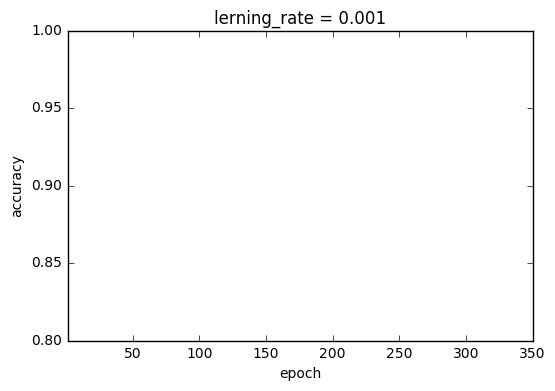

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


i = 349
learning_rate = 0.001
clear_percentage = 0.93
accuracy_dict = {
    'train':
    'valid':
}

# Show the result on graph
plt.xlabel("epoch")
epoch = np.arange(1, i+2, 1)
plt.ylabel("accuracy")
plt.axis([1,i+1, 0.8,1.0])
plt.title("lerning_rate = "+str(learning_rate))
clear_line = np.full(i+1, clear_percentage, dtype=float)
for data_type in ['train', 'valid'] :
    plt.plot(epoch,accuracy_dict[data_type], label=str(data_type))
plt.plot(epoch,clear_line,'r--', label=str(clear_percentage)+"%")
plt.legend()
plt.show()

### Grayscale and Normalize the test data

In [ ]:
''' Grayscale the test data '''
print("Grayscaling...")
for i in range(n_test):
    X_test[i] = np.expand_dims(cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY), axis=3)
# Nx32x32x3 ---> Nx32x32x1
X_test = X_test[:, :, :, 0:1]
print("The test data has been grayscaled\n")


''' Normarize the test data '''
print("Normarizing...")
X_test = (X_test - np.mean(X_test)) / np.mean(X_test)
print("The value data has been normarized\n")


print("The shape of  X_test is ", X_test.shape)
print("The shape of  y_test is ", y_test.shape)
print("\n")


''' Test the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    Rollback(X_test, y_test, 'test', Ws[best_epoch], bs[best_epoch])
##ENDWITH`sess`
 '''

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg


''' Load new images from jpg file '''
n_images = 5
# Initialize `new_images` whose shape is same as `X_train` with zeros.
new_images = np.zeros([1, X_train.shape[1], X_train.shape[2], 3])
for i in range(1, n_images+1):
    # Read an image
    image = mpimg.imread('./new_images/new_image'+str(i)+'.jpg')
    new_images = np.append(new_images, np.expand_dims(image,axis=0), axis=0)
# Trancate the first element of `new_images` that all elements are zeros, and cast to uint8 for RGB.
# (N+1)x32x32xC ---> Nx32x32xC
new_images = new_images[1: , ...].astype(np.uint8)
print("The shape of new_images is ", new_images.shape)


''' Load new labels from txt file '''
file_name = './new_images/new_labels.txt'
new_labels = np.array([])
with open(file_name) as f:
    for line in f.readlines():
        for label in line.split():
             new_labels = np.append(new_labels, int(label))
print("The shape of new_labels is ", new_labels.shape)
print("new_labels is ",new_labels)


''' Output the new images '''
for i in range(n_images):
    plt.figure()
    plt.imshow(new_images[i])


''' Save the new images & new labels data '''
new_images_file = './new_images/new_images.p'
new_labels_file = './new_images/new_labels.p'
with open(new_images_file, mode='wb') as f:
    pickle.dump(new_images, f)
with open(new_labels_file, mode='wb') as f:
    pickle.dump(new_labels, f)
print("The new_images & new_labels have been saved")

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

''' Grayscale the test data '''
print("Grayscaling...")
for i in range(new_images.shape[0]):
    new_images[i] = np.expand_dims(cv2.cvtColor(new_images[i], cv2.COLOR_RGB2GRAY), axis=3)
# Nx32x32x3 ---> Nx32x32x1
new_images = new_images[:, :, :, 0:1]
print("The test data has been grayscaled\n")


''' Normarize the test data '''
print("Normarizing...")
new_images = (new_images - np.mean(new_images)) / np.mean(new_images)
print("The value data has been normarized\n")


print("The shape of  new_images is ", new_images.shape)
print("The shape of  new_labels is ", new_labels.shape)
print("\n")


''' Test the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    Rollback(new_images, new_labels, 'new', Ws[best_epoch], bs[best_epoch])
##ENDWITH`sess`
 '''

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")